# **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

### **import libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **import raw data**

In [6]:
df=pd.read_csv("blinkit_data.csv")

In [ ]:
df.head(3)

### **size of data**

In [25]:
print('size of data:',df.shape)

size of data: (8523, 12)


### **Column list**

In [26]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **datatype info**

In [29]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **check for null values**

In [ ]:
df.isnull().sum()

### **convert null values into 0**

In [18]:
df['Item Weight']=df['Item Weight'].fillna(0)
df['Item Weight']=pd.to_numeric(df['Item Weight'], errors='coerce')

In [ ]:
df.isnull().sum()

### **data cleaning**

In [32]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [33]:
df['Item Fat Content']=df['Item Fat Content'].replace({'reg': 'Regular',
                                                      'low fat':'Low Fat',
                                                       'LF': 'Low Fat'})

In [34]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **Business Requirement**

#### **KPI requirement**

In [36]:
#total sales
total_sales=df['Sales'].sum()

#average sales
avg_sales=df['Sales'].mean()

#no of item sold
no_of_item_sold=df['Sales'].count()

#average rating
avg_rating=df['Rating'].mean()

#now to display it:
print(f"Total sales:${total_sales:,.0f}") 
print(f"Average sales:${avg_sales:,.0f}")
print(f"Number of item sold:{no_of_item_sold:,.0f}")
print(f"Average rating:{avg_rating:,.0f}")


Total sales:$1,201,681
Average sales:$141
Number of item sold:8,523
Average rating:4


### **Charts requirement**

#### **Total sales by fat content**

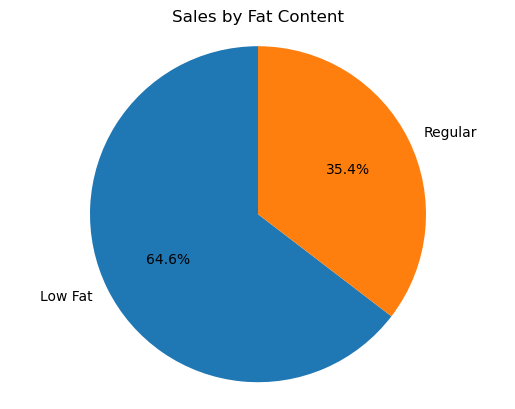

In [37]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index,
                      autopct ='%.1f%%',
                      startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()


#### **Total sales by item type**

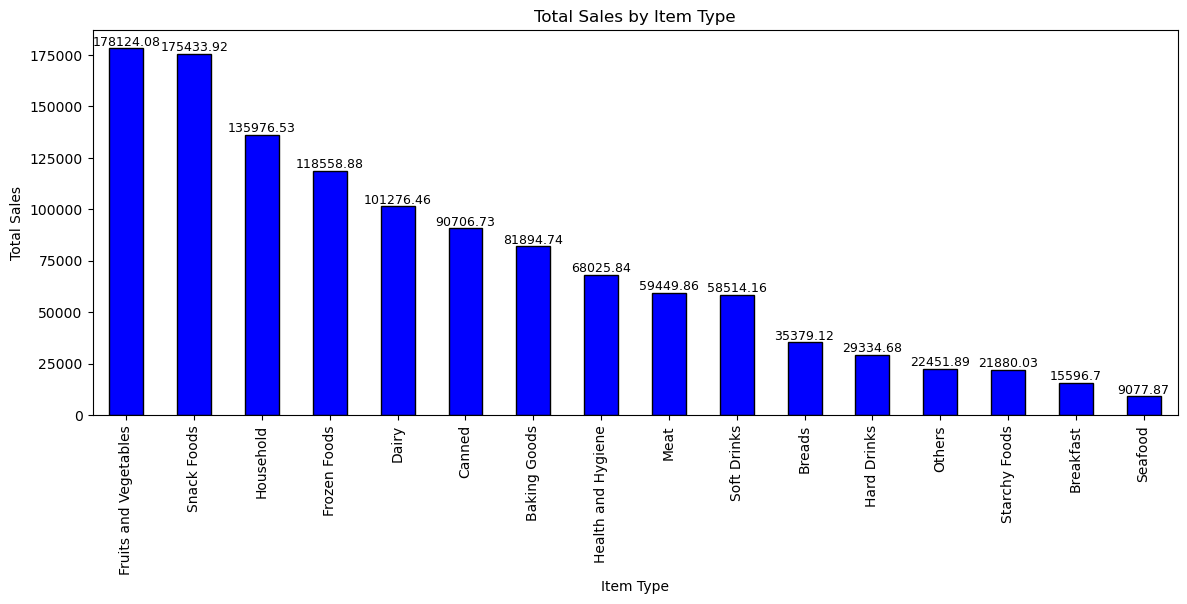

In [50]:
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
# Plot
plt.figure(figsize=(14,5))
ax=sales_by_item.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate labels if they overlap
# Add value labels
for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),   # round to 2 decimals if needed
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=9
    )

plt.show()



#### **Fat content by outlet for Total sales**

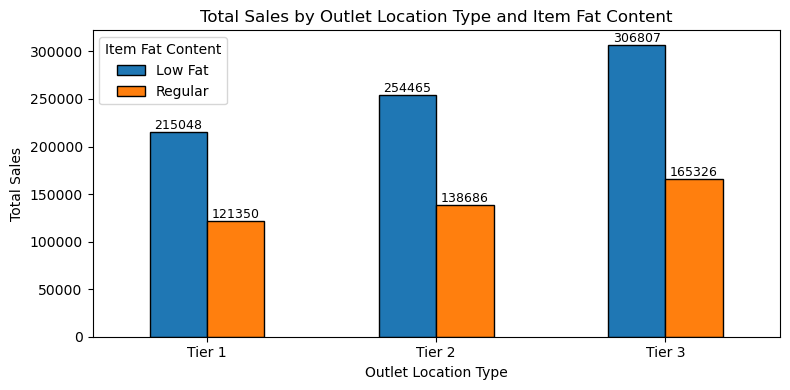

In [55]:
# Group by Outlet Location Type first, then Item Fat Content
grouped = (df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales']
             .sum()
             .unstack(fill_value=0)
             .sort_index())

# Plot
ax = grouped.plot(kind='bar', figsize=(8,4), edgecolor='black')

plt.title("Total Sales by Outlet Location Type and Item Fat Content")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Item Fat Content")

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=9)

plt.tight_layout()
plt.show()

#### **total sales by outlit establishment year**

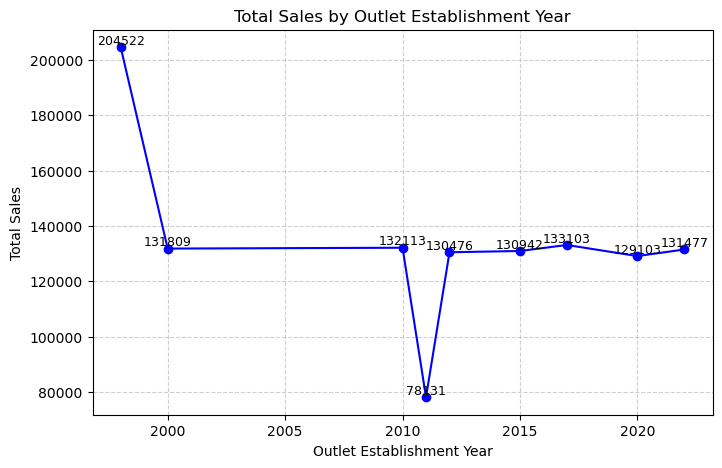

In [56]:

# Grouped and sorted data
sales_by_establish_year = (df.groupby('Outlet Establishment Year')['Sales']
                             .sum()
                             .sort_index())   # use sort_index() for chronological order

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(sales_by_establish_year.index, sales_by_establish_year.values, 
         marker='o', linestyle='-', color='b')

plt.title("Total Sales by Outlet Establishment Year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")

# Add labels on each point
for x, y in zip(sales_by_establish_year.index, sales_by_establish_year.values):
    plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **Sales by Outlet size**

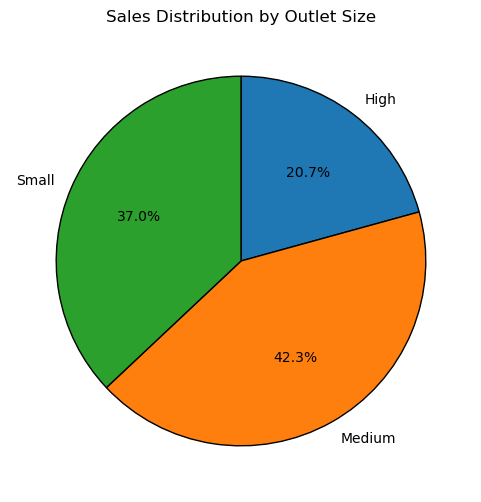

In [57]:
# Group data
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,     # labels = Outlet sizes (e.g., Small, Medium, High)
    autopct='%1.1f%%',              # show percentages with 1 decimal place
    startangle=90,                  # rotate chart for better readability
    counterclock=False,
    wedgeprops={'edgecolor':'black'} # neat borders
)

plt.title("Sales Distribution by Outlet Size")
plt.show()

#### **Sales by Outlet Location**

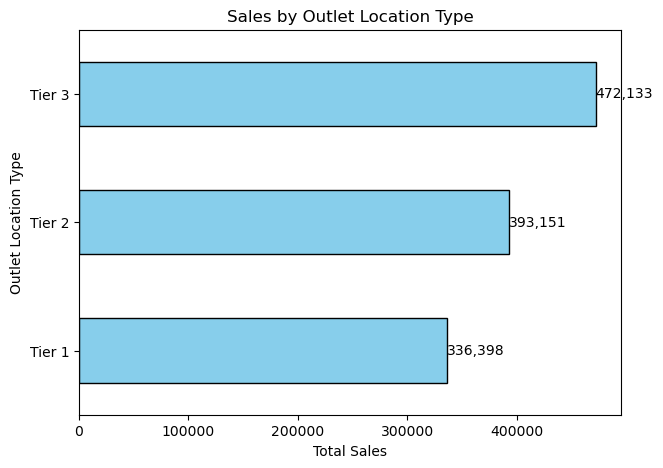

In [58]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum()
plt.figure(figsize=(7,5))
sales_by_location.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")

for i, val in enumerate(sales_by_location.sort_values()):
    plt.text(val, i, f"{val:,.0f}", va='center')  # add labels

plt.show()
